# Traffic Volume Analysis

# 1. Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Set Seaborn style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

# 2. Load Dataset

In [45]:
traffic = pd.read_csv('Traffic Volume.csv')

In [46]:
# Convert 'date_time' to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [47]:
# Quick overview
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [48]:
traffic.info()

<class 'pandas.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     str           
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  str           
 6   weather_description  48204 non-null  str           
 7   date_time            48204 non-null  datetime64[us]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[us](1), float64(3), int64(2), str(3)
memory usage: 3.3 MB


In [49]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,2016-01-05 10:46:16.773711,3259.818355
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,272.160000,0.000000,0.000000,1.000000,2014-02-06 11:45:00,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,2016-06-11 03:30:00,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,2017-08-11 06:00:00,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000
std,13.338232,44.789133,0.008168,39.015750,NaN,1986.860670


# 3. Overall Traffic Volume Distribution

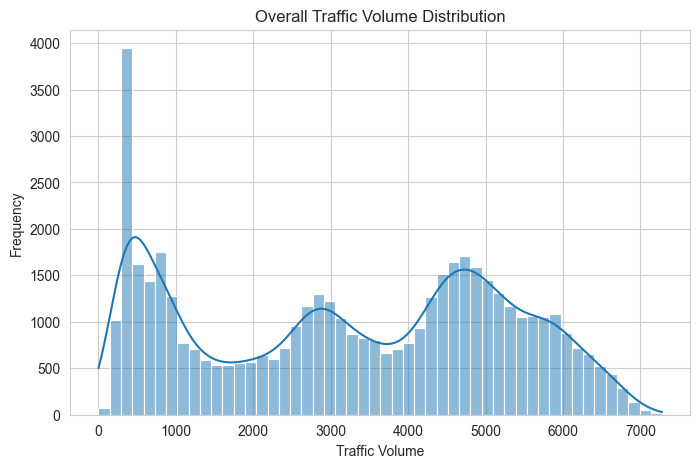

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(traffic['traffic_volume'], bins=50, kde=True)
plt.title('Overall Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# 4. Day vs Night Analysis

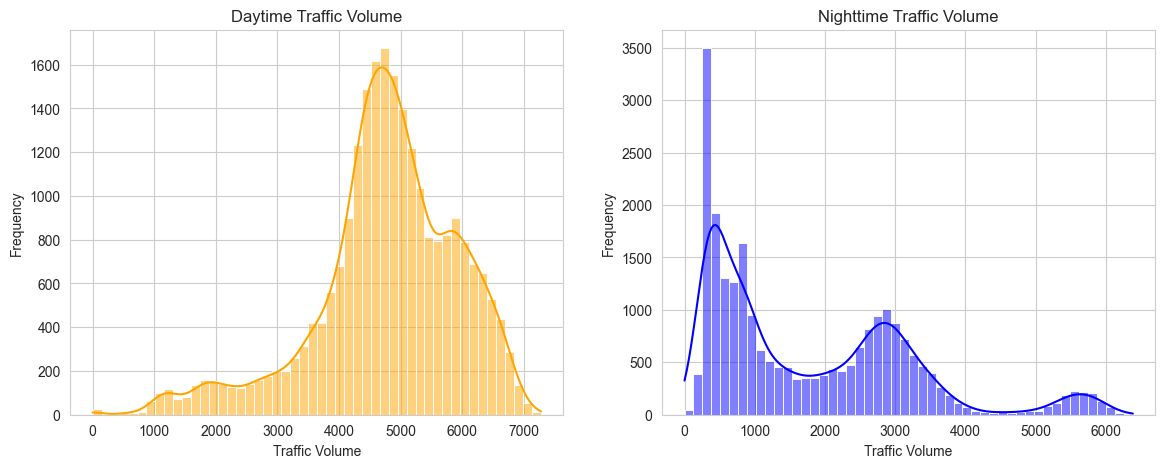

In [51]:
# Day: 7 AM - 7 PM
day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
# Night: 7 PM - 7 AM
night = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(day['traffic_volume'], bins=50, kde=True, color='orange')
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(night['traffic_volume'], bins=50, kde=True, color='blue')
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

# 5. Time Indicators

In [52]:
# Extract month, day of week, hour, and year
day['month'] = day['date_time'].dt.month
day['dayofweek'] = day['date_time'].dt.dayofweek
day['hour'] = day['date_time'].dt.hour
day['year'] = day['date_time'].dt.year

# 5a. Monthly Traffic

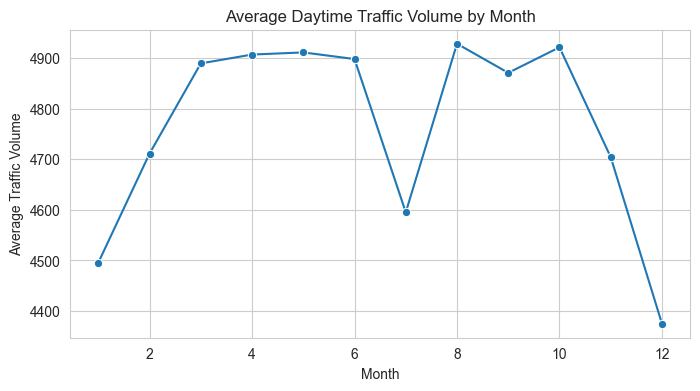

In [39]:
monthly_avg = day.groupby('month')['traffic_volume'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Daytime Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.show()

# 5b. Day of Week Traffic

C:\Users\MK\AppData\Local\Temp\ipykernel_11540\908629698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_avg.index, y=dow_avg.values, palette='viridis')


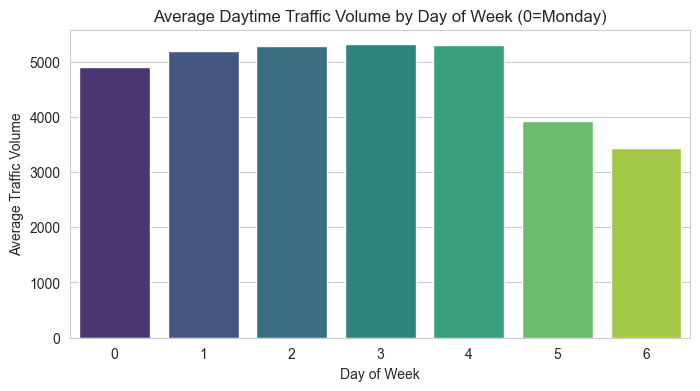

In [40]:
dow_avg = day.groupby('dayofweek')['traffic_volume'].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=dow_avg.index, y=dow_avg.values, palette='viridis')
plt.title('Average Daytime Traffic Volume by Day of Week (0=Monday)')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.show()

# 5c. Hourly Traffic: Business Days vs Weekends

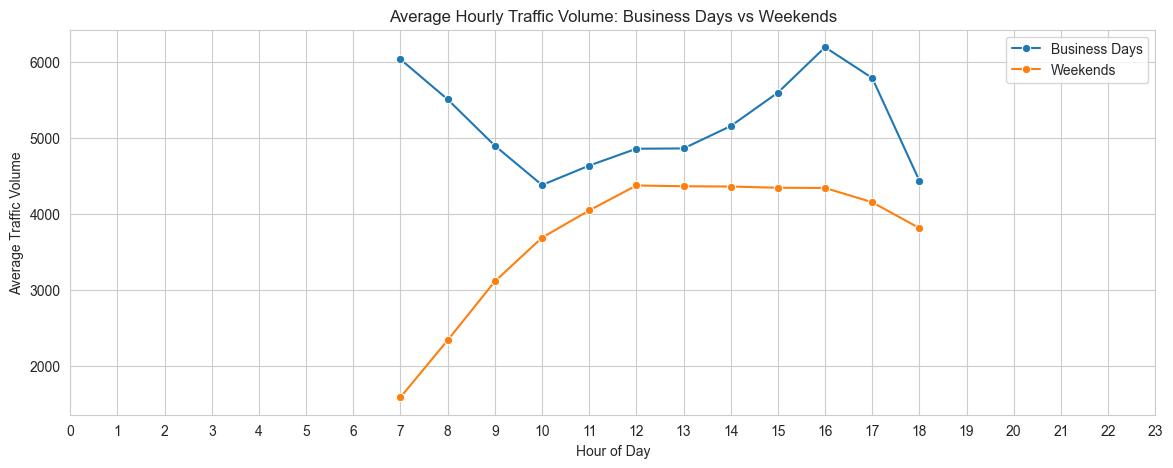

In [41]:
business_days = day[day['dayofweek'] <= 4]
weekends = day[day['dayofweek'] >= 5]

hourly_business = business_days.groupby('hour')['traffic_volume'].mean()
hourly_weekend = weekends.groupby('hour')['traffic_volume'].mean()

plt.figure(figsize=(14,5))
sns.lineplot(x=hourly_business.index, y=hourly_business.values, marker='o', label='Business Days')
sns.lineplot(x=hourly_weekend.index, y=hourly_weekend.values, marker='o', label='Weekends')
plt.title('Average Hourly Traffic Volume: Business Days vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0,24))
plt.legend()
plt.show()

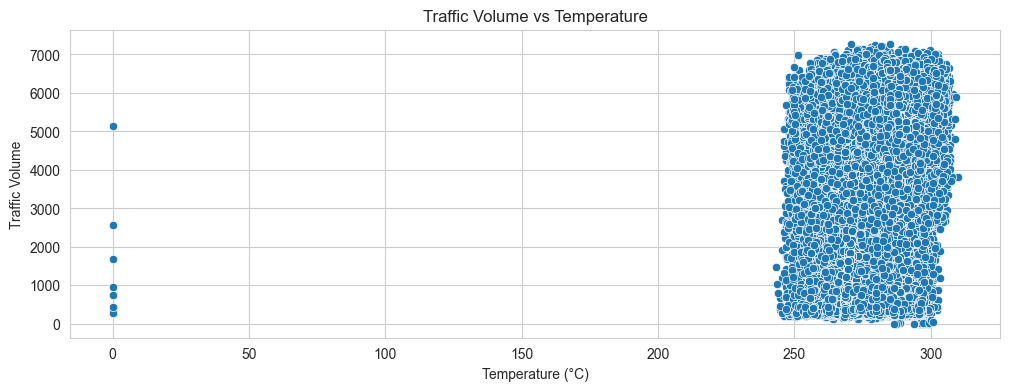

In [42]:
# -------------------------------

# -------------------------------

plt.figure(figsize=(12,4))
sns.scatterplot(x='temp', y='traffic_volume', data=traffic)
plt.title('Traffic Volume vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Traffic Volume')
plt.show()

# 7. Insights & Recommendations
- Daytime traffic is significantly higher than nighttime traffic.
- Warm months (March–October) have heavier traffic compared to cold months.
- Business days have higher traffic than weekends.
- Rush hours occur around 7 AM and 4 PM on business days.
- Optional: weather conditions can influence traffic and should be explored.